<font size="6">RNN - BiLSTM</font><br>
<font size="3">Prof. Dr. Renato Moraes Silva</font>

#Inicializa as bibliotecas gerais

In [ ]:
# Importando bibliotecas para computação científica e análise de dados
import numpy as np  # Biblioteca para arrays e operações numéricas
import pandas as pd  # Biblioteca para manipulação de dados tabulares

# Importando biblioteca para aprendizado de máquina
import sklearn as skl  # Biblioteca para aprendizado de máquina

# Importando bibliotecas para manipulação de strings e expressões regulares
import re  # Biblioteca para operações com expressões regulares

# Importando bibliotecas para interagir com o sistema operacional
import os  # Biblioteca para operações do sistema operacional, como manipulação de arquivos e diretórios
import subprocess  # Biblioteca para criação de novos processos e execução de comandos do sistema

# Importando biblioteca para manipulação de arquivos ZIP
from zipfile import ZipFile  # Classe para manipulação de arquivos ZIP

# Instalando e importando biblioteca para processamento de linguagem natural (NLP)
!pip install nltk
import nltk  # Biblioteca para processamento de linguagem natural

# Importando um stemmer específico para o português
from nltk.stem import RSLPStemmer  # Stemmer para a língua portuguesa

# Importando biblioteca para manipulação de caracteres Unicode
import unicodedata  # Biblioteca para manipulação de dados Unicode

# Instalando e importando biblioteca para modelagem de tópicos e processamento de texto
!pip install gensim
import gensim  # Biblioteca para modelagem de tópicos e processamento de texto

# Importando modelos de embeddings de palavras do gensim
from gensim.models import Word2Vec, KeyedVectors  # Modelos de embeddings de palavras

# Reimportando sklearn para acesso a módulos específicos
import sklearn as skl  # Biblioteca para aprendizado de máquina

from sklearn import model_selection

# Importando classe para codificação de rótulos categóricos
from sklearn.preprocessing import LabelEncoder  # Codificação de rótulos categóricos

# Importando métricas para avaliação de modelos de aprendizado de máquina
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc  # Métricas de avaliação de performance de modelos
# Importa a biblioteca matplotlib.pyplot para visualização de gráficos
import matplotlib.pyplot as plt

# Importa a biblioteca seaborn para visualização estatística
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Importando classes para validação cruzada
from sklearn.model_selection import StratifiedKFold

#Tenta Capturar a Sobreamostragem

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
final_train_df = pd.DataFrame()

Mounted at /content/drive


In [ ]:
final_train_df = pd.Series()
final_class_train_df = pd.Series()

In [ ]:
from collections import Counter

file_path = '/content/drive/MyDrive/AF_IA/aug_dataframe_bert.csv'

if os.path.exists(file_path):
    print(f"O Arquivo já existe e não precisa do pré processamento")
    final_df = pd.read_csv(file_path)
    final_train_df = final_df["Text"].copy()
    final_class_train_df = final_df["Class"].copy()

    aug_classes_count = Counter(final_class_train_df)

    print(f"{aug_classes_count}")
    print(f"\n\n{final_train_df}")
else:
    print(f"O Arquivo não existe e precisa do pré processamento")

O Arquivo já existe e não precisa do pré processamento
Counter({'GovSocial': 2067, 'CorpIndustrial': 2067, 'Mercados': 2067, 'Economia': 2067})


0       guterr diz nao qu cris ameac demit lisbo numer...
1       tmp papel comerc cofin numer mes numer pct lis...
2       apeleas faz balanc numer numeror trim numer nu...
3       acco recup fech apo abert fort ni acco continu...
4       pag divid refer exercici numer pag divid refer...
                              ...                        
8263    guterr receb audienc ham tietmey lisbo numer n...
8264    indic econom previso numer portug actu dia num...
8265    pag divid refer exercici numer pag divid numer...
8266    earthgraim inv numer mc fabr bimb portug lisbo...
8267    cotaco ofic lisbo numer fev reut cotaco ofic i...
Name: Text, Length: 8268, dtype: object


# Baixando a base de dados e Visualizando os Dados

In [ ]:
#define função para dowload
def download(url, path):

    # comando para fazer o download
    cmd = ['wget', '-q', url, '-O', '%s' %(path)]

    # executa o comando sem exibir a saída na tela
    processo = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # aguarda o término do download
    stdout, stderr = processo.communicate()

    # Verifica se o processo foi concluído com sucesso (código de retorno zero)
    if processo.returncode == 0:
        print(f'Processo finalizado.')
    else:
        print(f'Houve um erro: {stderr.decode("utf-8")}')

In [ ]:
#define função para descompactação
def unzip(path, pathFolder):

    try:
        # descompacta ao arquivo
        z = ZipFile(path, 'r')
        z.extractall(pathFolder)
        z.close()

        print("Arquivo descompactado com sucesso!")
    except:
        print("Houve um erro ao tentar descompactar o arquivo")

In [ ]:
url = 'https://www.dropbox.com/scl/fi/nvnwiv3qk4h2usyusizyw/arquivos_competicao.zip?rlkey=6cnsqmqfqn2w6c8xc296vvtg9&st=w0gst5mi&dl=0'

# especifica o local onde ficarao os arquivos
path_files = 'dados'
path_folder = '/content/dados'
path_dataset_name = '/arquivos_competicao.zip'
path_dataset = '/arquivos_competicao'

#Faz dowload da base de dados
download(url, path_dataset_name)

# descompacta a base de dados de notícias
unzip(path_dataset_name, path_files)

Processo finalizado.
Arquivo descompactado com sucesso!


In [ ]:
# Carregue o arquivo CSV de treino e teste
train_dataset = pd.read_csv(f'{path_folder+path_dataset}/train.csv')
test_dataset = pd.read_csv(f'{path_folder+path_dataset}/test.csv')

In [ ]:
train_dataset

,ID,Class
0,news_00002.xml,Mercados
1,news_00003.xml,Mercados
2,news_00006.xml,Mercados
3,news_00007.xml,Economia
4,news_00008.xml,Mercados
...,...,...
2776,news_03969.xml,Mercados
2777,news_03971.xml,Mercados
2778,news_03972.xml,Economia
2779,news_03973.xml,Mercados


In [ ]:
test_dataset

,ID
0,news_00001.xml
1,news_00004.xml
2,news_00005.xml
3,news_00011.xml
4,news_00015.xml
...,...
1188,news_03946.xml
1189,news_03948.xml
1190,news_03950.xml
1191,news_03965.xml


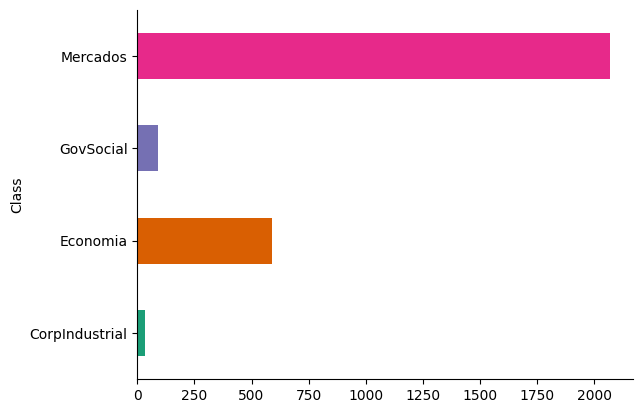

In [ ]:
train_dataset.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Pré-processamento da base de dados do tipo Text


In [ ]:
# Copiar a coluna "ID" do conjunto de dados de treinamento para uma variável separada.
train_df = train_dataset["ID"].copy()

# Copiar a coluna "Class" do conjunto de dados de treinamento para outra variável separada.
train_class_df = train_dataset["Class"].copy()

# Copiar a coluna "ID" do conjunto de dados de teste para uma variável separada.
test_df = test_dataset["ID"].copy()

# Obter as classes distintas presentes na coluna "Class" do conjunto de dados de treinamento.
distinctive_classes = np.unique(train_class_df)

# Imprimir as classes distintas presentes no conjunto de dados de treinamento.
print(f"Classes distintas:\n{distinctive_classes}")

Classes distintas:
['CorpIndustrial' 'Economia' 'GovSocial' 'Mercados']


In [ ]:
def preprocess_xml(filename):
    """
    Pré-processa um arquivo XML, lendo seu conteúdo e retornando como texto.

    Args:
        filename (str): O nome do arquivo XML a ser pré-processado.

    Returns:
        str: O conteúdo do arquivo XML como texto.
    """
    news_path = "/news"
    path = path_folder + path_dataset + news_path  # Caminho completo para o diretório de notícias
    file_text = open(path + '/' + filename, "r", encoding='utf8', errors='replace')  # Abre o arquivo XML para leitura
    text = file_text.read()  # Lê o conteúdo do arquivo XML como texto
    return text

# Pré-processamento dos arquivos XML de treinamento
for i, news_id in enumerate(train_df):
    train_df[i] = preprocess_xml(news_id)

# Pré-processamento dos arquivos XML de teste
for i, news_id in enumerate(test_df):
    test_df[i] = preprocess_xml(news_id)


In [ ]:
train_df

0       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
1       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
3       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
4       <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
                              ...                        
2776    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2777    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2778    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2779    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
2780    <?xml version="1.0" encoding="UTF-8"?>\n\n<new...
Name: ID, Length: 2781, dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('rslp')

def preprocessing_portuguese(text, stemming = False, stopwords = False):
  """
    Funcao usada para tratar textos escritos na lingua portuguesa

    Parametros:
        text: variavel do tipo string que contem o texto que devera ser tratado

        stemming: variavel do tipo boolean que indica se a estemizacao deve ser aplicada ou nao

        stopwords: variavel do tipo boolean que indica se as stopwords devem ser removidas ou nao
    """

  # Lower Case
  text = text.lower()

  # remove os acentos das palavras
  nfkd_form = unicodedata.normalize('NFKD', text)
  text = u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

  # remove tags HTML e XML
  regex = re.compile('<[^<>]+>')
  text = re.sub(regex, " ", text)

  # normaliza as URLs
  regex = re.compile('(http|https)://[^\s]*')
  text = re.sub(regex, "<URL>", text)

  # normaliza emails
  regex = re.compile('[^\s]+@[^\s]+')
  text = re.sub(regex, "<EMAIL>", text)

  # converte todos os caracteres não-alfanuméricos em espaço
  regex = re.compile('[^A-Za-z0-9]+')
  text = re.sub(regex, " ", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+.[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+,[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # normaliza os numeros
  regex = re.compile('[0-9]+')
  text = re.sub(regex, "NUMERO", text)

  # substitui varios espaçamentos seguidos em um só
  text = ' '.join(text.split())

  # separa o texto em palavras
  words = text.split()

  # remove stopwords
  if stopwords:
    words = text.split() # separa o texto em palavras
    words = [w for w in words if not w in nltk.corpus.stopwords.words('portuguese')]
    text = " ".join( words )

  # aplica estemização
  if stemming:
    stemmer_method = RSLPStemmer()
    words = [ stemmer_method.stem(w) for w in words ]
    text = " ".join( words )

  # remove palavras compostas por apenas um caracter
  words = text.split() # separa o texto em palavras
  words = [ w for w in words if len(w)>1 ]
  text = " ".join( words )

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
print('Antes do tratamento: ', train_df[3])

Antes do tratamento:  <?xml version="1.0" encoding="UTF-8"?>

<newsitem date="1996-10-29" id="root" itemid="50139" xml:lang="pt">
<title></title>
<headline> ÍNDICE PREÇOS PRODUÇÃO INDUSTRIAL AGO 1996 SOBE. </headline>
<byline></byline>
<dateline></dateline>
<text>
<p>     LISBOA, 29 Out (Reuter) - O Índice de Preços na Produção </p>
<p> Industrial subiu 0,3 pct para 120,6 em Agosto de 1996 </p>
<p> relativamente ao mês anterior, tendo aumentado 3,1 pct face a </p>
<p> Agosto de 1995, segundo dados hoje divulgados pelo Instituto </p>
<p> Nacional de Estatística (INE). </p>
<p>     A partir de Agosto de 1996, o INE passa a publicar o índice </p>
<p> geral deste indicador, o qual agrega &quot;cerca de 72 pct do valor </p>
<p> total das vendas de produtos, da indústria portuguesa, para o </p>
<p> mercado nacional&quot;, depois de passar a incluir os bens </p>
<p> intermédios e os bens de consumo não duradouro, segundo </p>
<p> informação do INE. </p>
<p>     .       AGO96     JUL96 AGO95  

In [ ]:
print('\nDepois do tratamento: ', preprocessing_portuguese(train_df[3], stemming = True, stopwords = True))


Depois do tratamento:  indic prec produca industr ago numer sob lisbo numer out reut indic prec produca industr sub numer pct numer agost numer relativ me anteri tend aument numer pct fac agost numer segund dad hoj divulg institut nacion estatis ine part agost numer ine pass public indic geral dest indic agreg quot cerc numer pct val total vend produt industr portugu merc nacion quot pass inclu bem intermedi bem consum nao duradour segund informaca ine agonumer julnumer agonumer indic geral numer numer numer variaca mens numer pct numer pct variaca homolog numer pct numer pct acumul ano numer pct numer pct acumul ult numer mes numer pct numer pct lisbo editor numer numer reut limited numer reut limited numer


In [ ]:
# Aplicar a função de pré-processamento aos conjuntos de dados de treino e teste com remoção de stopwords e estemizacao
train_df = train_df.apply(lambda x: preprocessing_portuguese(x, stemming=True, stopwords=True))
test_df = test_df.apply(lambda x: preprocessing_portuguese(x, stemming=True, stopwords=True))

In [ ]:
train_df

0       futur ot dez numer cai numer contr numer pt fu...
1       resum transacco merc continu lisbo numer set r...
2       indic psinumer sob numer pont numer numer lisb...
3       indic prec produca industr ago numer sob lisbo...
4       bdp interromp problem comunicaco lisbo numer s...
                              ...                        
2776    mmi transacc numer mc futur faz numer mc lisbo...
2777    escud abr pression alt contr marc escud abr su...
2778    result ult colocaco bt pdnw dat praz coloc tax...
2779    acco preve corrig esper nov iorqu acco continu...
2780    ugt qu assin ace falt numer aument salari nume...
Name: ID, Length: 2781, dtype: object

In [ ]:
test_df

0       prova inflaca retom tendenc descend ine lisbo ...
1       mmi transacc numer mc futur faz numer mc lisbo...
2       acco segu pouc volatel apat dev mant lisbo num...
3       escud seg estavel apa mei sessa escud segu rel...
4       mmi transacc numer mc tmp numer pct lisbo nume...
                              ...                        
1188    sistem fiscal penaliz empr nao financ aip lisb...
1189    sous franc admit polic fiscal mant sigil lisbo...
1190    ipi nov numer cai numer pct numer vs nov numer...
1191    bp nao cort tax dev inflaca camb lisbo numer n...
1192    ipc nao transaciona dev desc abaix numer bp li...
Name: ID, Length: 1193, dtype: object

#Sobreamostragem dos Dados

In [ ]:
!pip install transformers
!pip install nlpaug

import nlpaug.augmenter.word.context_word_embs as aug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

sample_text = train_df.iloc[100]
print(f"Original: \n{sample_text}")
augmented_sample_text = augmenter.augment(sample_text)
print(f"Gerada: \n{augmented_sample_text}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Original: 
receit irc numer sob numer pct numer mc oe lisbo numer out reut receit prev impost sobr rendimenrt pesso colec irc numer dev cresc numer pct numer milho cont mc segund propost orc est oe numer hoj entreg assemble republ quot fac fort cresc verific numer irc numer pct receit prev numer numer mc represent cresc numer pct justifica nao so dad declaraco model numer receb numer previsa comport numer import empr contribuint dest impost quot adiant document govern prev aind autorizaca diminu tax irc ate doi pct quot prev govern fiqu autor diminu tax irc ate doi pct med ser exequi funca exit adopca simultane sistem colect min program regularizaca div quot diz propost oe numer receit irc contribuira aind receit obt titul recuperaca div ganh eficac serv fiscalizaca bem introduca min colect lisbo editor numer numer reut limited numer reut limited numer
Gerada: 
['receit irc numer sob numer pct numer mc oe lisbo numer to out reut receit prev impost sobr rendimenrt pesso colec irc numer 

In [ ]:
data = {'Class': train_class_df, 'Text': train_df}
grouped_data = pd.DataFrame(data)
grouped_data

,Class,Text
0,Mercados,futur ot dez numer cai numer contr numer pt fu...
1,Mercados,resum transacco merc continu lisbo numer set r...
2,Mercados,indic psinumer sob numer pont numer numer lisb...
3,Economia,indic prec produca industr ago numer sob lisbo...
4,Mercados,bdp interromp problem comunicaco lisbo numer s...
...,...,...
2776,Mercados,mmi transacc numer mc futur faz numer mc lisbo...
2777,Mercados,escud abr pression alt contr marc escud abr su...
2778,Economia,result ult colocaco bt pdnw dat praz coloc tax...
2779,Mercados,acco preve corrig esper nov iorqu acco continu...


In [ ]:
from sklearn.utils import shuffle
from tqdm.auto import tqdm

def augmentData(target_df, targetClass, samples, augmenter):
    global aug_train_df
    augmented_texts = []

    for i in tqdm(np.random.randint(0, len(target_df), samples)):
        augmented_text = augmenter.augment(target_df['Text'].iloc[i])
        augmented_texts.append(augmented_text[0])

    data = {
        'Class': targetClass,
        'Text': augmented_texts
    }

    partial_aug_df = pd.DataFrame(data)
    aug_df = shuffle(pd.concat([target_df, partial_aug_df]).reset_index(drop=True))

    return aug_df

In [ ]:
count_classes = Counter(train_class_df)
value_most_common_class = count_classes.most_common(1)[0][1]
aug_train_df = pd.DataFrame()

def generateNewDocuments(class_id, samples):
  global aug_train_df
  target_aug_df = pd.DataFrame()

  if samples == 0:
    class_aug_df = grouped_data[grouped_data['Class'] == class_id].reset_index(drop=True)
  else:
    target_df = grouped_data[grouped_data['Class'] == class_id].reset_index(drop=True)
    target_aug_df = augmentData(target_df, class_id, samples, augmenter)

  aug_train_df = shuffle(pd.concat([aug_train_df, target_aug_df]).reset_index(drop=True))
  #aug_train_df.to_csv('/content/drive/MyDrive/AF_IA/aug_dataframe_bert.csv', index=False)

In [ ]:
print(f'Distribuição original do dataset: \n{count_classes}\n\n')

for class_id, count in count_classes.items():
    samples = value_most_common_class - count
    #samples = 1;
    generateNewDocuments(class_id, samples);

    if not aug_train_df.empty:
      count_aug_classes = Counter(aug_train_df["Class"])
      print(f'Distribuição Atual do dataset: \n{count_aug_classes}\n\n')

count_aug_classes = Counter(aug_train_df["Class"])
print(f'Nova distribuição do dataset: \n{count_aug_classes}')

In [ ]:
final_train_df = aug_train_df["Text"].copy()
final_class_train_df = aug_train_df["Class"].copy()

print(final_train_df)

1134    banc portug diz trm numer pct proc bpdf lisbo ...
283     resum transacco merc continu pdnx lisbo numer ...
432     acco preve alt prac internac acco continu futu...
1926    monetari fech calm fra sub marg lisbo numer ag...
2013    escud estavel manh vs marc pouc inter numer tm...
                              ...                        
1773    futur psinumer setnumer sob numer pont numer f...
1043    mmi transacc numer mc futur faz numer mc lisbo...
878     acco abr alt moder cimp brilh lisbo numer jan ...
354     escud fech estavel vs marc pod desliz lisbo nu...
1678    psinumer sob numer pct numer numer pont lisbo ...
Name: Text, Length: 2658, dtype: object


# Geração de Word Embeddings

A geração de word embeddings é um processo fundamental no campo de processamento de linguagem natural (PLN), onde o objetivo é representar palavras como vetores numéricos em um espaço de alta dimensionalidade. Esses vetores capturam o significado semântico das palavras e são utilizados para alimentar algoritmos de PLN em uma variedade de tarefas, como análise de sentimento, tradução automática, sumarização de texto e muito mais.

In [ ]:
# Cria uma lista de listas contendo as palavras divididas de cada texto no conjunto de treinamento
train_df_embeddings = [text.split() for text in final_train_df]

# Cria uma lista de listas contendo as palavras divididas de cada texto no conjunto de teste
test_df_embeddings = [text.split() for text in test_df]

In [ ]:
print("10 palavras de treino")
print(train_df_embeddings[3][:10])

print("10 palavras de teste")
print(test_df_embeddings[3][:10])

10 palavras de treino
['acco', 'recup', 'fech', 'apo', 'abert', 'fort', 'ni', 'acco', 'continu', 'fech']
10 palavras de teste
['escud', 'seg', 'estavel', 'apa', 'mei', 'sessa', 'escud', 'segu', 'relativ', 'estavel']


### Usando o próprio dataset para treinar as embeddings

Word Embeddings treinadas pelo próprio dataset pode se tornar uma abordagem eficaz quando o conjunto de dados for grande o suficiente e representativo o bastante para capturar a diversidade de riqueza da linguagem.

In [ ]:
# Atribui os dados de treinamento fornecidos (`train_df_embeddings`) à variável self_embedding_train
self_embedding_train = train_df_embeddings

# Define uma função para criar e treinar um modelo de embedding
def create_embedding_model(vector_size, window , min_count):
    # Inicializa e treina um modelo Word2Vec com os parâmetros especificados
    embedding_model = Word2Vec(
                        sentences = self_embedding_train,  # Dados de treinamento
                        vector_size = vector_size,  # Tamanho dos vetores de palavra
                        window = window,  # Janela de contexto máxima
                        min_count = min_count  # Contagem mínima de ocorrência de palavra
                      )

    # Calcula o tamanho do vocabulário do modelo treinado
    vocabulary_size = len(embedding_model.wv)

    # Imprime o tamanho do vocabulário na tela
    print("\nTamanho do vocabulário do modelo: ", vocabulary_size)

    # Retorna o modelo de embedding treinado
    return embedding_model

In [ ]:
embedding_model = create_embedding_model(200, 3 ,1)


Tamanho do vocabulário do modelo:  5998


In [ ]:
def get_doc_vector(model, doc):
    # Inicializa uma lista para armazenar os vetores das palavras no documento
    words_list = []

    # Itera sobre cada palavra no documento
    for word in doc:
        try:
            # Tenta obter o vetor da palavra no modelo de embedding
            vector = model.wv[word]
            # Se a palavra estiver presente no vocabulário, adiciona seu vetor à lista
            words_list.append(vector)
        except:
            # Se a palavra não estiver no vocabulário do modelo, passa para a próxima palavra
            pass

    # Calcula o vetor médio do documento, utilizando a média dos vetores das palavras presentes
    if len(words_list) > 0:
        mean_vector = np.mean(words_list, axis=0)
    else:
        # Se o documento estiver vazio ou todas as palavras estiverem fora do vocabulário, retorna um vetor de zeros
        mean_vector = np.zeros(model.wv.vector_size)

    # Retorna o vetor médio do documento
    return mean_vector

def dataset_2_feature_matrix(dataset, embedding_model):
    # Inicializa uma lista para armazenar os vetores médios de cada documento
    embedding = []

    # Itera sobre cada documento no conjunto de dados
    for doc in dataset:
        # Obtém o vetor médio do documento usando a função get_doc_vector
        vec = get_doc_vector(embedding_model, doc)
        # Adiciona o vetor médio do documento à lista de embeddings
        embedding.append(vec)

    # Converte a lista de embeddings em uma matriz numpy
    embedding = np.array(embedding)

    # Retorna a matriz de embeddings
    return embedding


In [ ]:
verify_doc_vector = ['a', 'economia', 'esta', 'ruim']

# Obtém o vetor médio para o documento de verificação usando a função get_doc_vector
document_vector = get_doc_vector(embedding_model, verify_doc_vector)

print("\nVerificar o vetor médio do documento de verificação: ", document_vector)

# Converte o conjunto de treinamento em uma matriz de características usando embeddings
X_train_embedding = dataset_2_feature_matrix(train_df_embeddings, embedding_model)

# Converte o conjunto de teste em uma matriz de características usando embeddings
X_test_embedding = dataset_2_feature_matrix(test_df_embeddings, embedding_model)

print("\nDimensão das embeddings de treino: ", X_train_embedding.shape)
print("Dimensão das embeddings de teste: ", X_test_embedding.shape)



Verificar o vetor médio do documento de verificação:  [-4.87499595e-01  1.81559712e-01  3.66376400e-01  1.43635683e-02
  3.89185190e-01 -1.34557500e-01 -3.08376998e-01 -3.68976891e-01
 -4.88764465e-01  8.05474401e-01 -5.81695497e-01 -1.37744144e-01
  2.56303251e-01 -5.03113270e-01  1.53816029e-01  1.53232291e-01
 -1.69879735e-01 -2.29789644e-01 -4.66242313e-01 -8.69329929e-01
 -1.46878436e-02  1.12850457e-01  5.00575781e-01 -3.83360505e-01
 -1.43322170e-01 -2.50685573e-01 -1.44286990e-01  1.32742181e-01
  2.11707532e-01 -4.75823969e-01  2.81807691e-01  1.33570611e-01
 -1.29238933e-01  3.19724113e-01  4.05041903e-01  6.10912144e-02
 -1.78755254e-01 -1.31427333e-01  4.49780554e-01  8.74230191e-02
  3.22066694e-02  3.25057983e-01 -4.22762096e-01  4.94709581e-01
 -4.41832483e-01  9.24019217e-02 -1.66813985e-01 -5.56411967e-02
  7.68898189e-01  1.88193232e-01  4.94086519e-02  2.83662915e-01
 -2.00232863e-02  2.45039389e-02 -2.33034581e-01  5.25086820e-01
 -9.62142646e-03  1.46757230e-01 -7

### Utilizando um modelo pré treinado de embeddings

Um modelo pré-treinado de embeddings é um modelo de embedding de palavras que foi treinado em um grande corpus de texto antes de ser disponibilizado para uso. Aqui estão alguns pontos importantes sobre modelos pré-treinados de embeddings:

será utilizado um modelo pré treinado disponibilizado em aula, dessa vez utilizando o KeyedVectors do Gensim.

In [ ]:
# URL de onde o arquivo de embeddings pré-treinados será baixado
url = 'http://143.107.183.175:22980/download.php?file=embeddings/fasttext/skip_s50.zip'

# Caminho onde o arquivo de embeddings pré-treinados será armazenado após o download
path_embedding_trained = path_folder + '/skip_s50.zip'

# Função para baixar o arquivo de embeddings pré-treinados do URL e salvar no caminho especificado
download(url, path_embedding_trained)

Processo finalizado.


In [ ]:
unzip(path_embedding_trained, path_folder)

Arquivo descompactado com sucesso!


In [ ]:
# Cria os vetores pela base de dados
embedded_pretrained = gensim.models.KeyedVectors.load_word2vec_format(f'{path_folder}/skip_s50.txt')

# Obter o tamanho do vocabulário do modelo
vocabSize = len(embedded_pretrained.index_to_key)
print("Tamanho do vocabulário do modelo: ", vocabSize)

Tamanho do vocabulário do modelo:  929605


In [ ]:
def get_word_vector(embedding_model, word):
    try:
        # Tenta obter o vetor de embedding para a palavra especificada no modelo de embedding
        return embedding_model.get_vector(word)
    except KeyError:
        # Se a palavra não estiver presente no vocabulário do modelo, retorna um vetor de zeros
        return np.zeros(embedding_model.vector_size)

def dataset_2_feature_matrix_pretrained(dataset, embedding_model):
    embedding = []

    for document in dataset:
        # Calcula o vetor de documento médio como a média dos vetores de palavras no documento
        doc_vector = np.mean([get_word_vector(embedding_model, word) for word in document], axis=0)
        # Adiciona o vetor de documento à lista de embeddings
        embedding.append(doc_vector)

    # Converte a lista de embeddings em uma matriz numpy
    embedding = np.array(embedding)

    return embedding


In [ ]:
X_train_emb_pretrained = dataset_2_feature_matrix_pretrained(train_df_embeddings, embedded_pretrained)
X_test_emb_pretrained = dataset_2_feature_matrix_pretrained(test_df_embeddings, embedded_pretrained)

print("Dimensão das embeddings pré treinadas de treino: ", X_train_emb_pretrained.shape)
print("Dimensão das embeddings pré treinadas de teste: ", X_test_emb_pretrained.shape)

Dimensão das embeddings pré treinadas de treino:  (8268, 50)
Dimensão das embeddings pré treinadas de teste:  (1193, 50)


# Define Modelo de LSTM com o Word Embedding

Uma LSTM (Long Short-Term Memory) é um tipo de rede neural recorrente (RNN) projetada para modelar dados sequenciais e capturar dependências de longo prazo em sequências de dados.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Cria um objeto LabelEncoder
label_encoder = LabelEncoder()

# Converte as classes para numerais
train_classes_df_encoded = label_encoder.fit_transform(final_class_train_df)

# Converte as classes numéricas para a forma one-hot
train_classes_one_hot = to_categorical(train_classes_df_encoded, num_classes=4)
train_classes_one_hot

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
def define_lstm_model(X_train, Y_train, X_test, input_shape, epochs = 10, verbose = 0):
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.LSTM(
      units = 210,
      return_sequences = True,
      input_shape = input_shape
  ))

  model.add(layers.Bidirectional(
      layers.LSTM(
          units = 200,
          return_sequences = False,
          input_shape = input_shape
      )
  ))

  model.add(tf.keras.layers.Dense(
      units = 4,
      activation = "softmax"
  ))

  optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001,
  )

  model.compile(
      optimizer = optimizer,
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
  )

  if verbose == 1:
    print("LSTM configurada com sucesso")
    # summarize the model
    print(model.summary())

  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

  history = model.fit(
      x = X_train,
      y = Y_train,
      epochs = epochs,
      batch_size = 250,
      validation_split = 0.2,
      verbose = verbose
  )

  y_pred = model.predict(X_test)

  return  y_pred

## Predição Dataset de Treino e Teste

> Utilizando todos os modelos criados:
- Word Embeddings
- Word Embeddings Pré Treinado


In [ ]:
input_shape_pre_embedding = (X_train_emb_pretrained.shape[1], 1)
input_shape_embedding = (X_train_embedding.shape[1], 1)

In [ ]:
# Realiza a predição para diferentes formatos e salva os resultados em arquivos CSV
_ = define_lstm_model(X_train_emb_pretrained, train_classes_one_hot, X_test_emb_pretrained, input_shape_pre_embedding, 40, 1)
_ = define_lstm_model(X_train_embedding, train_classes_one_hot, X_test_embedding, input_shape_embedding, 40, 1)

In [ ]:
def validation_model(X, y, input_shape, epochs):
    # Divide os dados em conjuntos de treinamento e validação usando validação cruzada estratificada
    kfold = StratifiedKFold(n_splits=2, shuffle=True)

    y_multiclass = np.argmax(y, axis=1)
    # Armazena os scores de F1 e AUC para cada iteração da validação cruzada
    auc_scores = []
    f1_scores = []

    # Para armazenar curvas ROC
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    # Itera sobre cada fold da validação cruzada
    for train_index, val_index in kfold.split(X, y_multiclass):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Gera as previsões para o conjunto de validação usando o formato especificado
        y_proba = define_lstm_model(X_train, y_train, X_val, input_shape, epochs, 0)
        y_val_multiclass = np.argmax(y_val, axis=1)
        # Calcula as métricas AUC e F1 para a iteração atual
        auc_value = roc_auc_score(y_val_multiclass, y_proba, multi_class='ovo')
        y_pred_classes = np.argmax(y_proba, axis=1)
        f1 = f1_score(y_val_multiclass, y_pred_classes, average='macro')

        # Armazena os scores para a iteração atual
        auc_scores.append(auc_value)
        f1_scores.append(f1)

        # Calcula a curva ROC para a iteração atual
        fpr, tpr, _ = roc_curve(y_val_multiclass, y_proba[:, 1], pos_label=1)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Plot da curva ROC média
    plt.figure(figsize=(10, 7))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Média da curva ROC',
             lw=2, alpha=0.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadeiro Positivo')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Calcula a média dos scores de F1 e AUC para todas as iterações da validação cruzada
    mean_auc = np.mean(auc_scores)
    mean_f1 = np.mean(f1_scores)

    # Imprime as métricas médias AUC e F1
    print(f"\n\nAUC médio: {mean_auc}")
    print(f"F1-score médio: {mean_f1}\n")

130/130 [==============================] - 19s 135ms/step


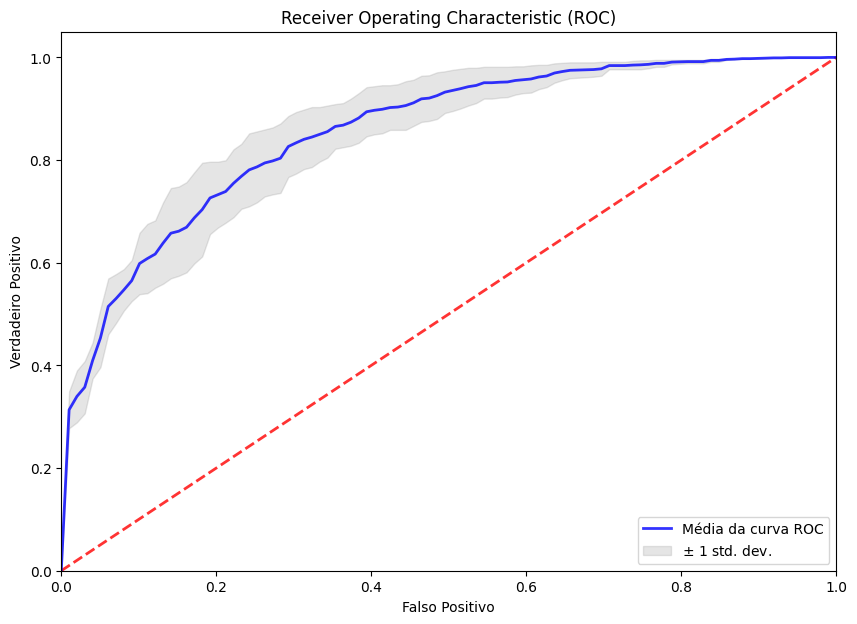

In [ ]:
validation_model(X_train_emb_pretrained, train_classes_one_hot, input_shape_pre_embedding, 40)



AUC médio: 0.9217547735979885
F1-score médio: 0.7319387039599623

130/130 [==============================] - 66s 491ms/step


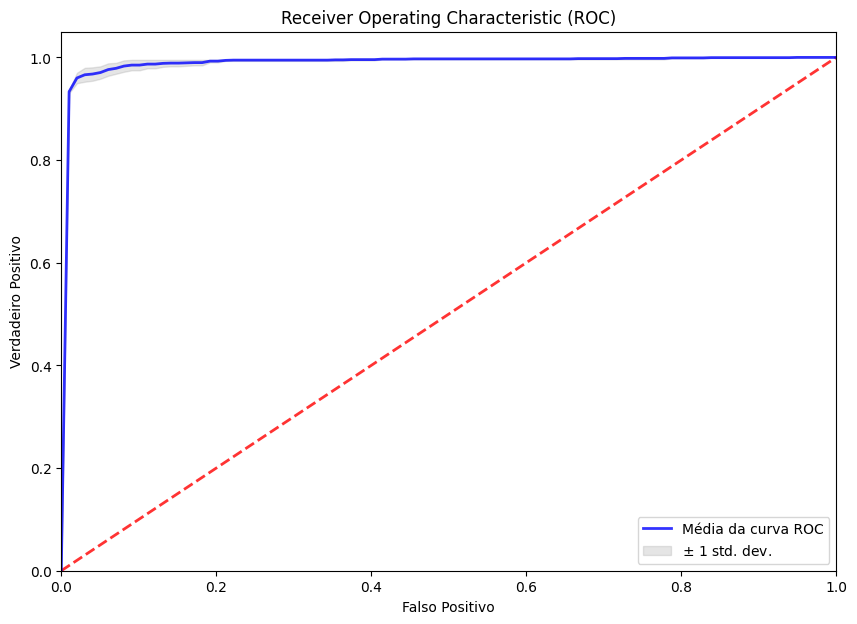



AUC médio: 0.9967811768002872
F1-score médio: 0.971918668813164



In [ ]:
validation_model(X_train_embedding, train_classes_one_hot, input_shape_embedding, 40)